## Preprocessing

In [104]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
import re
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [105]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [106]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [107]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [108]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = [appType for appType in application_df["APPLICATION_TYPE"].value_counts().index if application_df["APPLICATION_TYPE"].value_counts()[appType] < 50]

# # Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()




APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: count, dtype: int64

In [109]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [110]:
# You may find it helpful to look at CLASSIFICATION value counts >1
for cls in application_df["CLASSIFICATION"].value_counts().index:
    if application_df["CLASSIFICATION"].value_counts()[cls] > 1:
        print(f"{cls} {application_df['CLASSIFICATION'].value_counts()[cls]}")

C1000 17326
C2000 6074
C1200 4837
C3000 1918
C2100 1883
C7000 777
C1700 287
C4000 194
C5000 116
C1270 114
C2700 104
C2800 95
C7100 75
C1300 58
C1280 50
C1230 36
C1400 34
C7200 32
C2300 32
C1240 30
C8000 20
C7120 18
C1500 16
C1800 15
C6000 15
C1250 14
C8200 11
C1238 10
C1278 10
C1235 9
C1237 9
C7210 7
C2400 6
C1720 6
C4100 6
C1257 5
C1600 5
C1260 3
C2710 3
C0 3
C3200 2
C1234 2
C1246 2
C1267 2
C1256 2


In [111]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = [clType for clType in application_df['CLASSIFICATION'].value_counts().index if application_df['CLASSIFICATION'].value_counts()[clType] < 50]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: count, dtype: int64

In [112]:
application_df['INCOME_AMT'].value_counts()

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: count, dtype: int64

In [113]:
application_df['MAX_INCOME'] = application_df['INCOME_AMT'].map(lambda x: re.split('-', x)[-1])
application_df['MAX_INCOME'] = application_df['MAX_INCOME'].map(lambda x: re.sub('M', '000000', x))
application_df['MAX_INCOME'] = application_df['MAX_INCOME'].replace('50000000+', application_df['ASK_AMT'].max() + 1)
application_df['MAX_INCOME'] = application_df['MAX_INCOME'].astype('int64')

In [114]:
application_df['ASK_INCOME'] = application_df['MAX_INCOME'] > application_df['ASK_AMT']
application_df['ASK_INCOME'].value_counts()

ASK_INCOME
False    26725
True      7574
Name: count, dtype: int64

In [115]:
# Convert categorical data to numeric with `pd.get_dummies`
X = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'ASK_INCOME', "INCOME_AMT", "SPECIAL_CONSIDERATIONS"])
X.head()

,ASK_AMT,IS_SUCCESSFUL,MAX_INCOME,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,108590,1,9999,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,5000,0,0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,6692,1,24999,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,142590,1,499999,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [116]:
# Split our preprocessed data into our features and target arrays
y = X['IS_SUCCESSFUL']
X = X.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [117]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [122]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
tf.keras.backend.clear_session()
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=59, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_dim=59))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=32, activation="relu", kernel_regularizer=regularizers.l2(0.001),))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 59)                3540      
                                                                 
 dense_1 (Dense)             (None, 32)                1920      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,605
Trainable params: 7,605
Non-trainable params: 0
_________________________________________________________________


In [123]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [124]:
# Save model checkpoints
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

import math
n_batches = len(X_train_scaled) / batch_size
n_batches = math.ceil(n_batches)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=5*n_batches)

In [125]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 4s 4ms/step - loss: 0.6214 - accuracy: 0.7175
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5817 - accuracy: 0.7301
Epoch 3/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5718 - accuracy: 0.7313
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5654 - accuracy: 0.7313
Epoch 5/50
794/804 [============================>.] - ETA: 0s - loss: 0.5613 - accuracy: 0.7323
Epoch 5: saving model to training_2\cp-0005.ckpt
804/804 [==============================] - 3s 4ms/step - loss: 0.5611 - accuracy: 0.7325
Epoch 6/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5586 - accuracy: 0.7318
Epoch 7/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5563 - accuracy: 0.7327
Epoch 8/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5548 - accuracy: 0.7331
Epoch 9/50
804/804 [==============================] - 4s 4ms/step 

In [126]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5544 - accuracy: 0.7334 - 641ms/epoch - 2ms/step
Loss: 0.5544282793998718, Accuracy: 0.7334110736846924


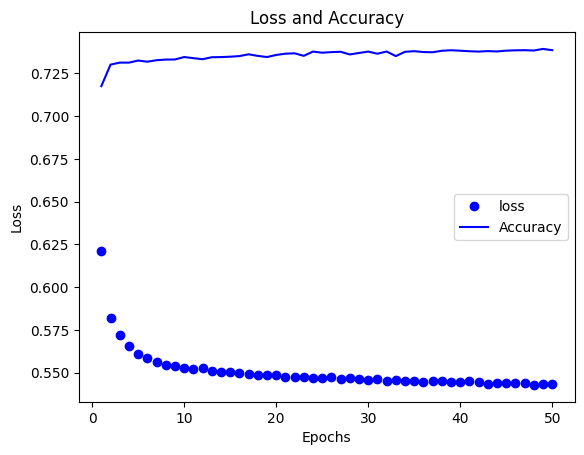

In [127]:
history = fit_model.history

loss = history['loss']
accuracy = history['accuracy']

epochs = range(1, len(accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='loss')
# b is for "solid blue line"
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [128]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.h5')